In [1]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 1.1 MB 62.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=bac74bed1ad2137c1f730b78c6ffd5a20c67a6d5c7cdf9d552f26c689de804dd
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=e498f935d301f5f7bfcda5bebe6bc842124b43ff27ed91687ae11c0d4f9214d8
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import umap  

In [3]:
def elbow_plot(df: pd.DataFrame,  random_state=0): 
  distortions = []
  K = range(1,10)
  for k in K:
    Model = KMeans(n_clusters=k, random_state=random_state)
    Model.fit(df)
    distortions.append(Model.inertia_)
  
  plt.figure(figsize=(16,8))
  plt.plot(K, distortions, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Distortion')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()
  
  return 0

def silhouette(df: pd.DataFrame): 
  
  K = range(2, 10)
  silhouette_scores = []
  for k in K: 
    ag = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    score = silhouette_score(df, ag.fit_predict(df))
    silhouette_scores.append(score)
    
  # Plotting a bar graph to compare the results
  plt.bar(K, silhouette_scores)
  plt.xlabel('Number of clusters', fontsize = 20)
  plt.ylabel('S(i)', fontsize = 20)
  plt.show()

Часть 1. EDA и Preprocessing
1.Скачайте данные по клиентам немецкого банка: https://www.kaggle.com/uciml/german-credit
2.Проведите EDA, чтобы познакомиться с признаками 
3.Преобразуйте все признаки в числовые подходящими методами
4.Приведите все данные к одному масштабу (а заодно поясните, почему это необходимая операция при кластеризации)

Часть 2. Моделирование
1.Постройте три варианта кластеризации: k-means, hierarhical и DBSCAN, подберите оптимальное количество кластеров для каждого метода при помощи Elbow method и Silhouette plot 
2.Также воспользуйтесь различными вариантами сжатия признакового пространства (PCA, UMAP, tSNE) и визуализируйте результаты кластеризации на двумерной плоскости 

Часть 3. Интерпретация
1.Теперь ваша задача - попытаться проинтерпретировать получившиеся кластеры, начните с простого расчета средних значений признаков для каждого из кластеров, есть ли интересные закономерности? 
2.Теперь постройте boxplot-ы для каждого признака, сгруппировав значения по кластерам, по каким признакам заметно наибольшее отличие кластеров друг от друга? Можно ли их интерпретировать? 

In [4]:
df = pd.read_csv('/content/german_credit_data.csv', index_col=0)

In [5]:
base = df.copy()

## EDA

In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


Пока не понятно, что делать с пропусками

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [ ]:
print(df['Housing'].unique())
print(df['Saving accounts'].unique())
print(df['Checking account'].unique())
print(df['Purpose'].unique())

['own' 'free' 'rent']
[nan 'little' 'quite rich' 'rich' 'moderate']
['little' 'moderate' nan 'rich']
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [ ]:
df['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [ ]:
df.loc[df['Saving accounts'].isna() == True, :]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
5,35,male,1,free,NaN,NaN,9055,36,education
16,53,male,2,own,NaN,NaN,2424,24,radio/TV
17,25,male,2,own,NaN,little,8072,30,business
24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment
...,...,...,...,...,...,...,...,...,...
968,29,male,2,rent,NaN,NaN,7166,42,radio/TV
977,42,male,2,own,NaN,moderate,2427,18,business
990,37,male,1,own,NaN,NaN,3565,12,education
992,23,male,1,rent,NaN,little,1936,18,radio/TV


In [ ]:
df.loc[df['Saving accounts'] == 'rich', :]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
8,61,male,1,own,rich,NaN,3059,12,radio/TV
27,42,female,2,rent,rich,rich,409,12,radio/TV
30,36,male,2,own,rich,moderate,1913,18,business
67,22,male,2,own,rich,moderate,1007,12,car
94,54,male,2,own,rich,moderate,1318,12,car
136,27,male,2,own,rich,NaN,8613,27,car
140,27,male,0,own,rich,rich,709,6,car
149,46,male,2,own,rich,NaN,1582,18,radio/TV
153,29,female,2,rent,rich,moderate,7758,24,car
167,20,female,2,own,rich,moderate,1577,11,furniture/equipment


In [ ]:
df['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [6]:
df['Saving accounts'] = df['Saving accounts'].fillna('none')
df['Checking account'] = df['Checking account'].fillna('none')

Похоже, что больше всего берут кредит на покупку техники и автомобилей

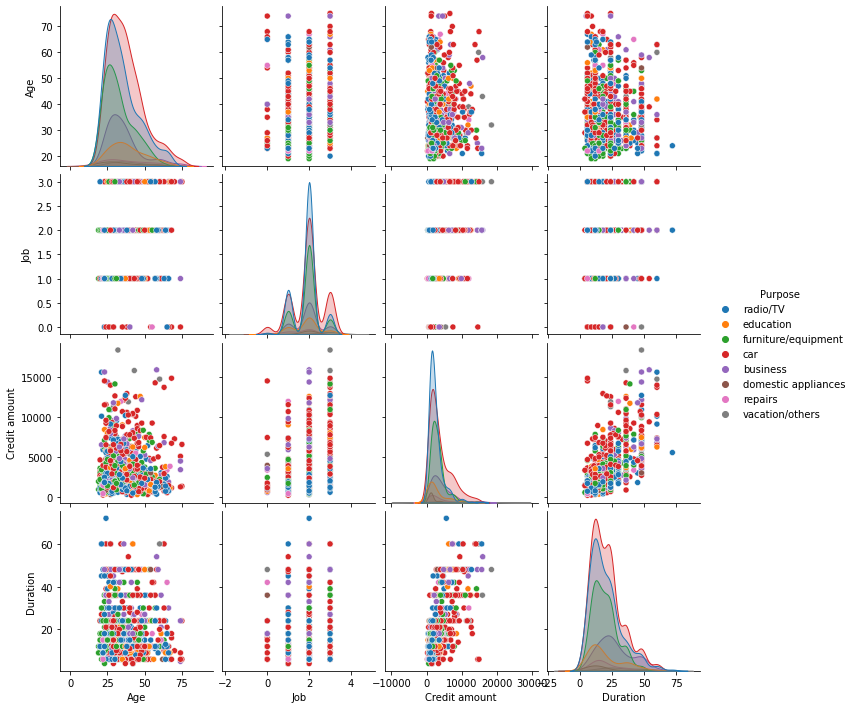

In [ ]:
sns.pairplot(df, hue="Purpose")

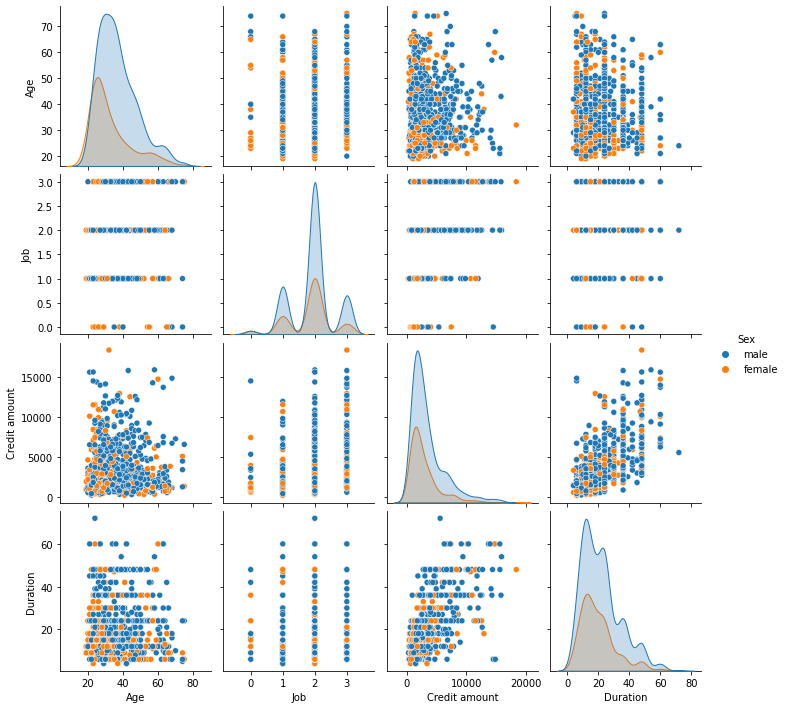

In [ ]:
sns.pairplot(df, hue="Sex")

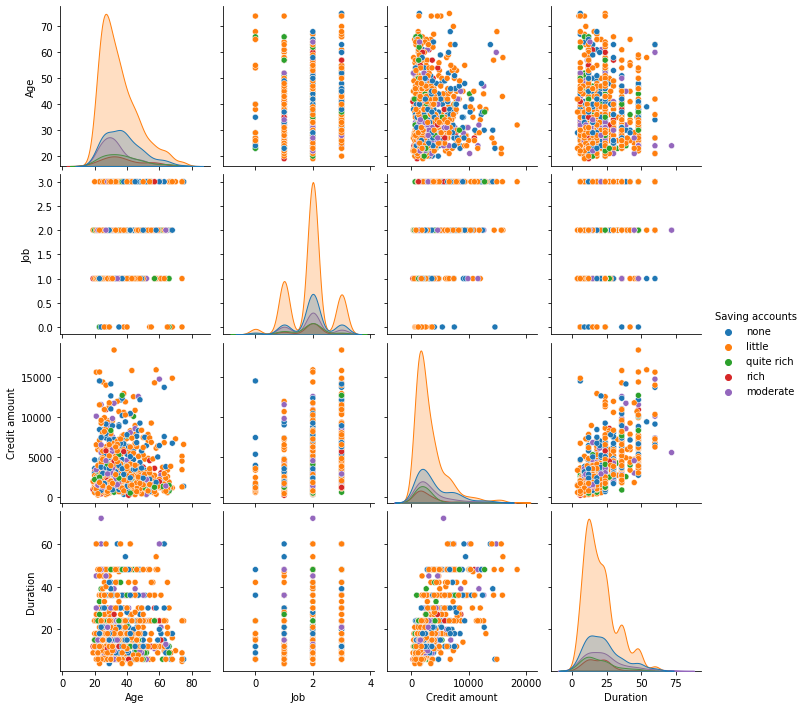

In [ ]:
sns.pairplot(df, hue="Saving accounts")

Есть некая линейная зависимость между размером кредита и его сроком выплаты, что логично

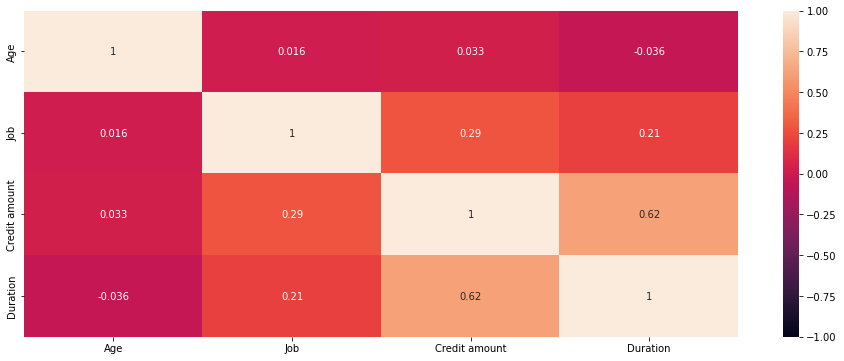

In [ ]:
plt.figure(figsize=(16, 6)) 
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True) 

In [7]:
# Кодирование категориальных переменных 
cat_features = [ 'Sex', 'Housing', 
                 'Saving accounts', 'Checking account',
                  'Purpose']

le = LabelEncoder()
for i in cat_features:
  df[i] = le.fit_transform(df[i])

In [8]:
# Стандартизация данных
columns = df.columns

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)

Стандартизация данных при решении задачи кластеризации необходима потому, что алгоритмы кластеризации вычисляют расстояние между точками в гиперплоскости. В случае большого различия между измерениями признаков, при расчете расстояния меньшие значения почти не будут иметь никакого влияния  

### KMeans

In [9]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

df_kmeans = df.copy()
df_kmeans['kmeans'] = kmeans.predict(df)

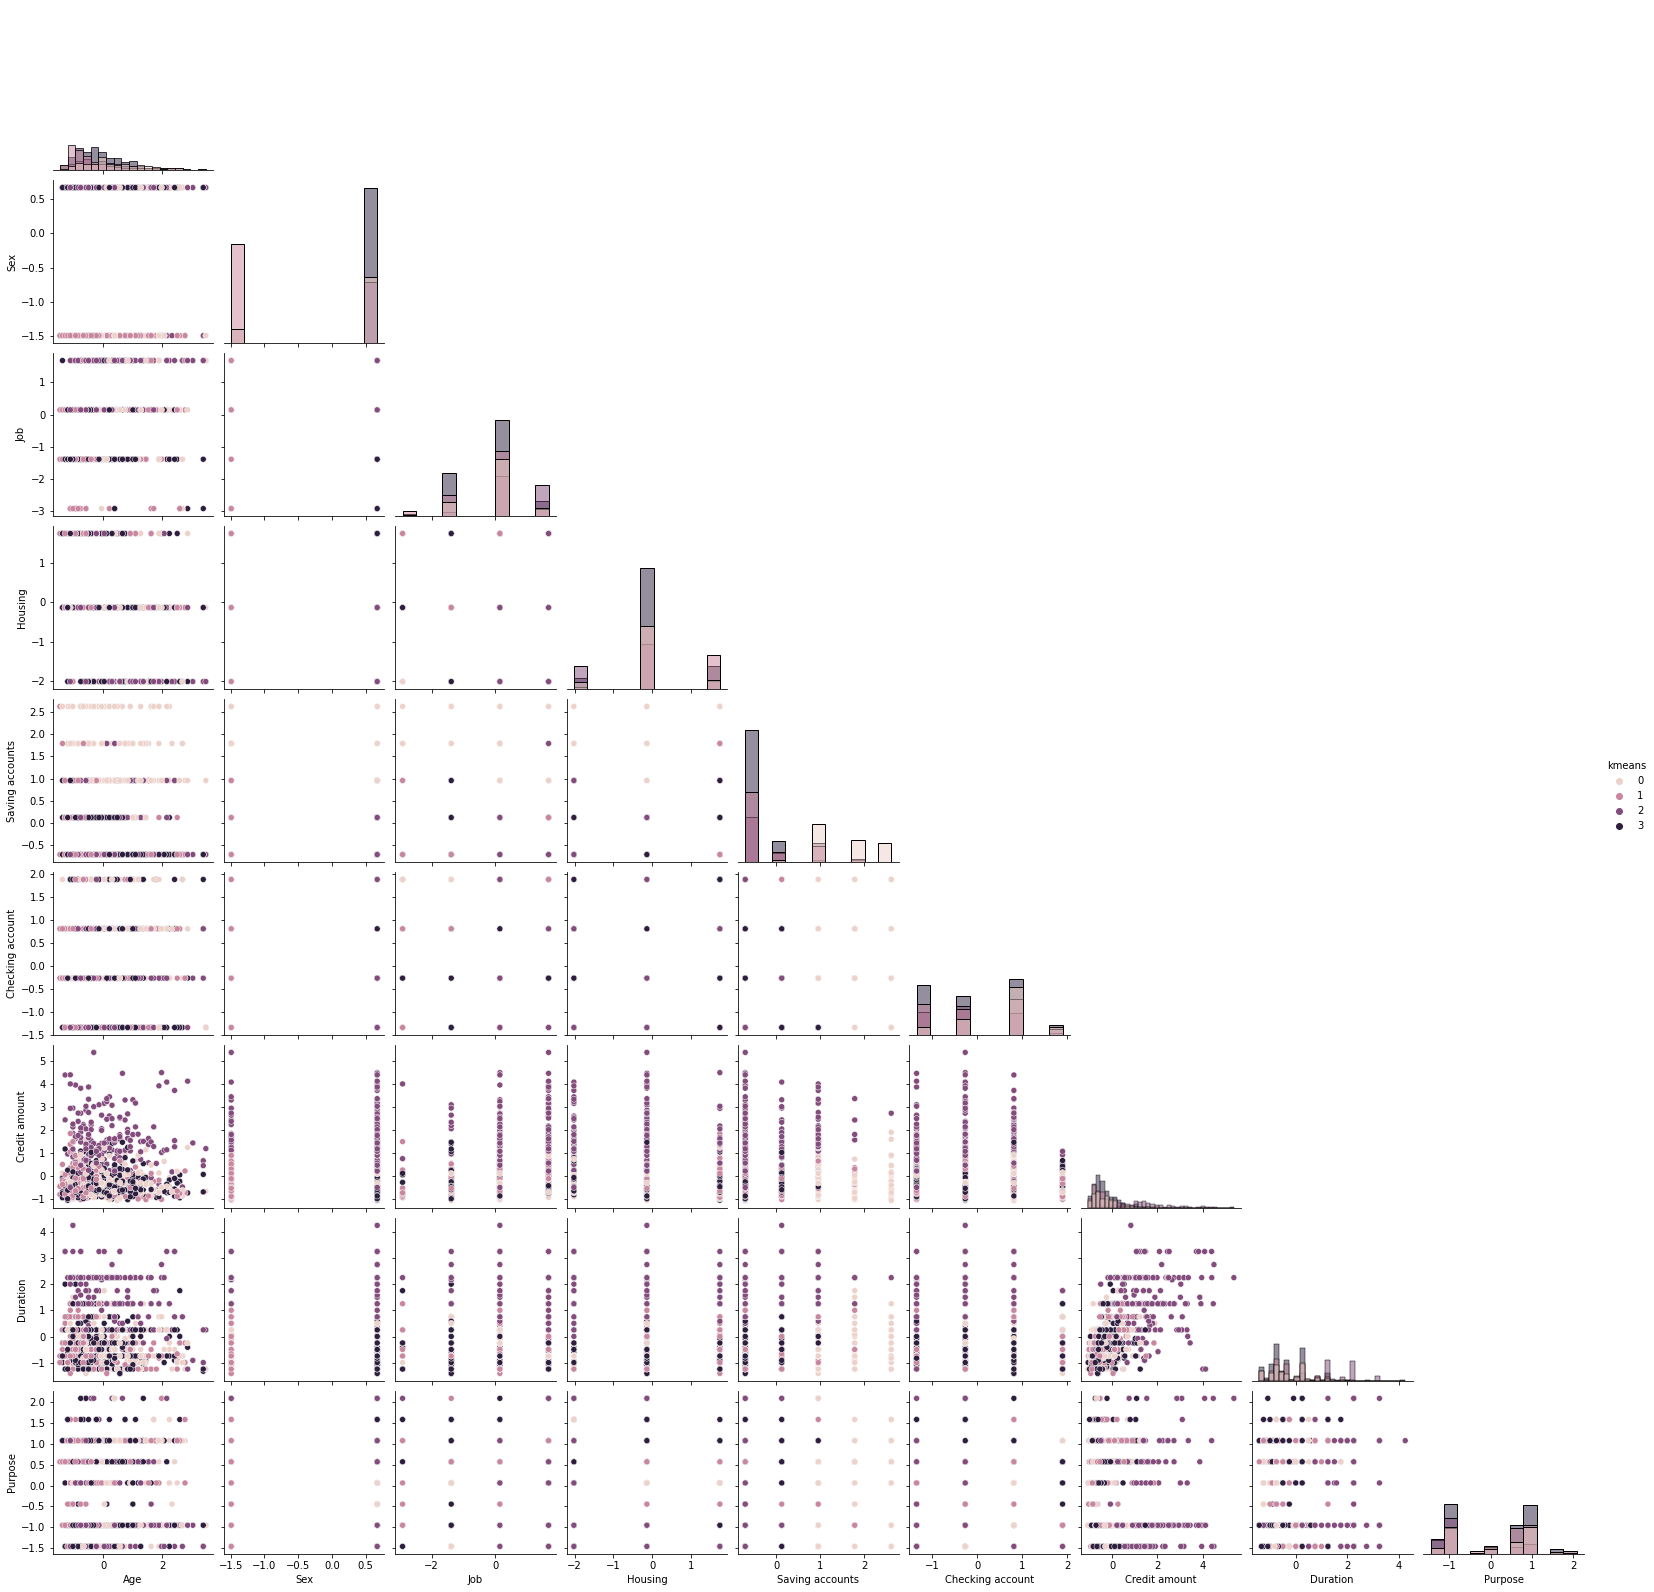

In [10]:
sns.pairplot(df_kmeans, kind="scatter", hue='kmeans', diag_kind="hist", corner=True)

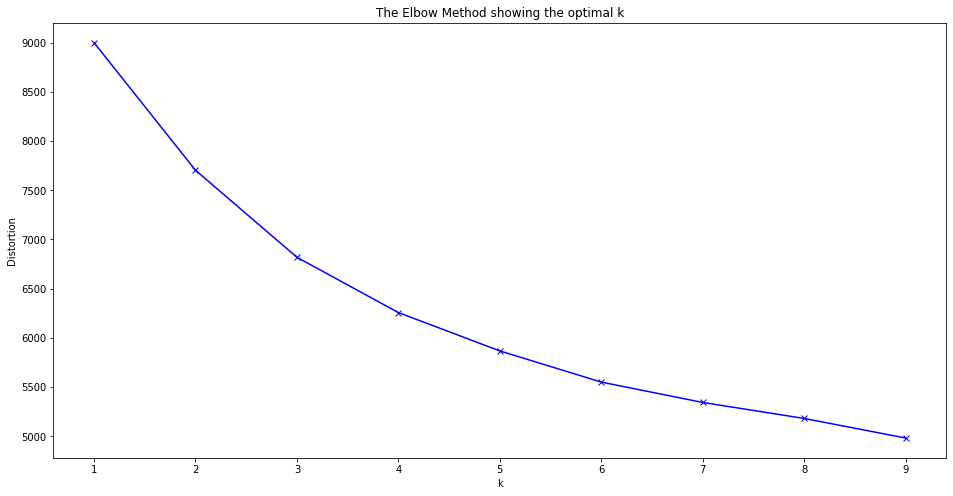

0

In [11]:
# Не совсем понятно, сколько кластеров здесь должно быть 
elbow_plot(df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


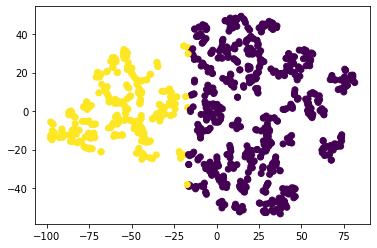

In [12]:
# TSNE с двумя компонентами 
tsne = TSNE(n_components=2, perplexity=10, learning_rate=100, init='random', random_state=0)

df_transformed = pd.DataFrame(tsne.fit_transform(df))

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_transformed)

df_transformed.columns =  [str(x) for x in df_transformed.columns]
df_transformed['kmeans'] = kmeans.predict(df_transformed)

plt.scatter(df_transformed['0'], df_transformed['1'], c=df_transformed['kmeans'])
plt.show()

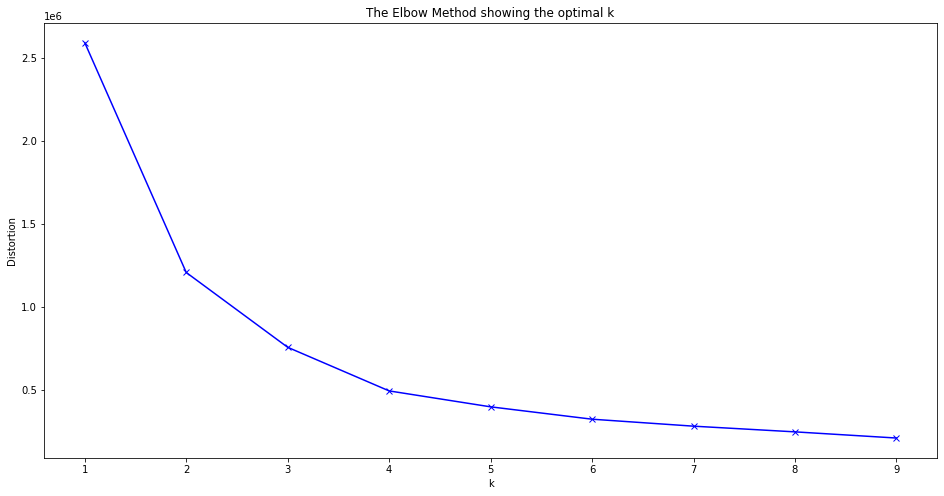

0

In [13]:
# В глаза бросается перелом на двух кластерах
elbow_plot(df_transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


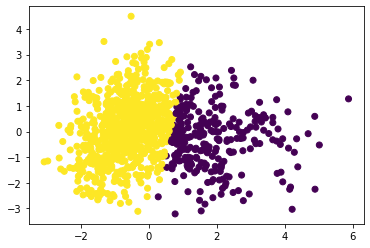

In [14]:
pca = PCA(n_components=2, random_state=0)
df_transformed = pd.DataFrame(pca.fit_transform(df))


kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_transformed)

df_transformed.columns =  [str(x) for x in df_transformed.columns]
df_transformed['kmeans'] = kmeans.predict(df_transformed)

plt.scatter(df_transformed['0'], df_transformed['1'], c=df_transformed['kmeans'])
plt.show()

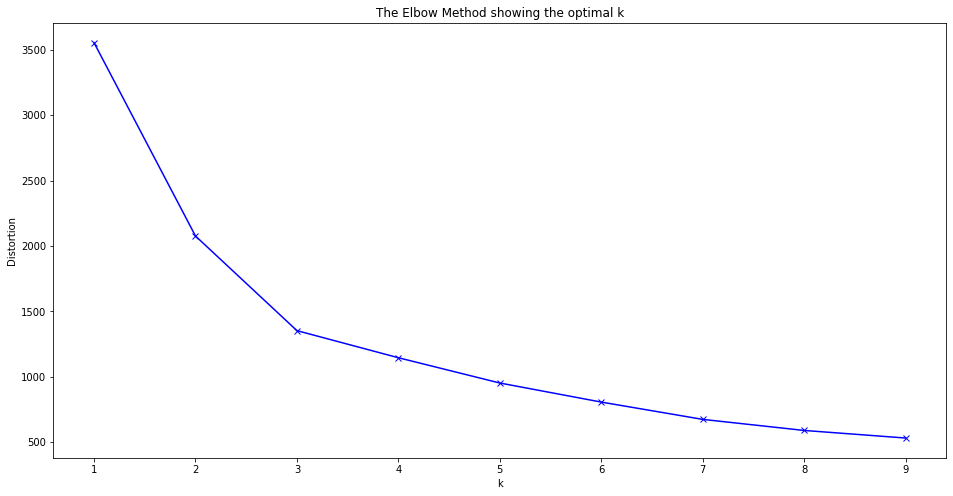

0

In [15]:
# Перелом на двух кластерах, но еще сильнее перелом на трех кластерах
elbow_plot(df_transformed)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


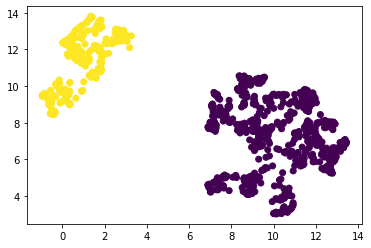

In [16]:
# UMAP
umap_transformator = umap.UMAP(random_state=0)
df_transformed = pd.DataFrame(umap_transformator.fit_transform(df))
 
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_transformed)

df_transformed.columns =  [str(x) for x in df_transformed.columns]
df_transformed['kmeans'] = kmeans.predict(df_transformed)

plt.scatter(df_transformed['0'], df_transformed['1'], c=df_transformed['kmeans'])
plt.show()

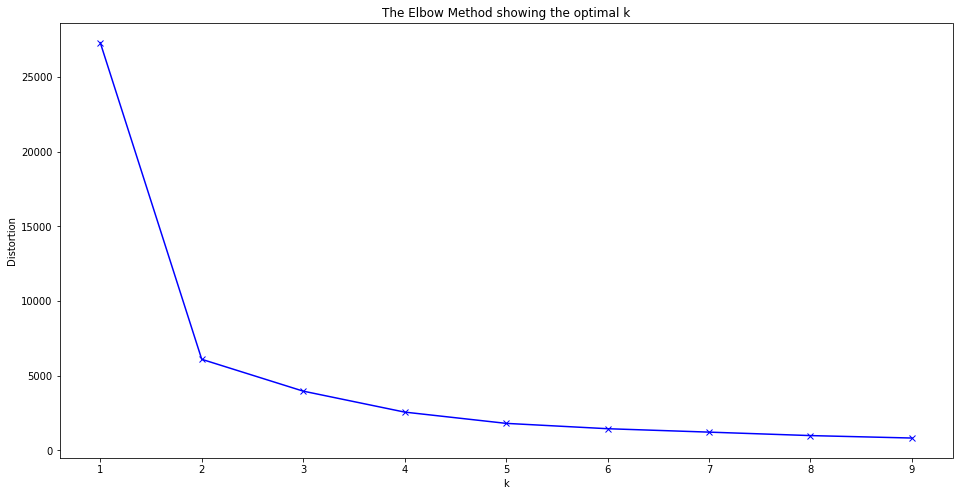

0

In [17]:
# Очевидно, что 2 кластера
elbow_plot(df_transformed)

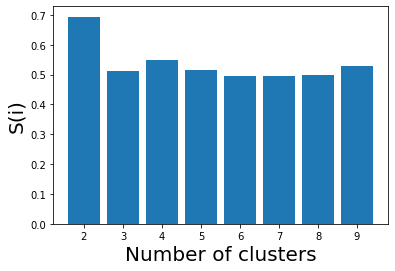

In [18]:
silhouette(df_transformed)

### AgglomerativeClustering

In [19]:
hierarhical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

df_hierarhical = df.copy()
df_hierarhical['hierarhical'] =  hierarhical.fit_predict(df)

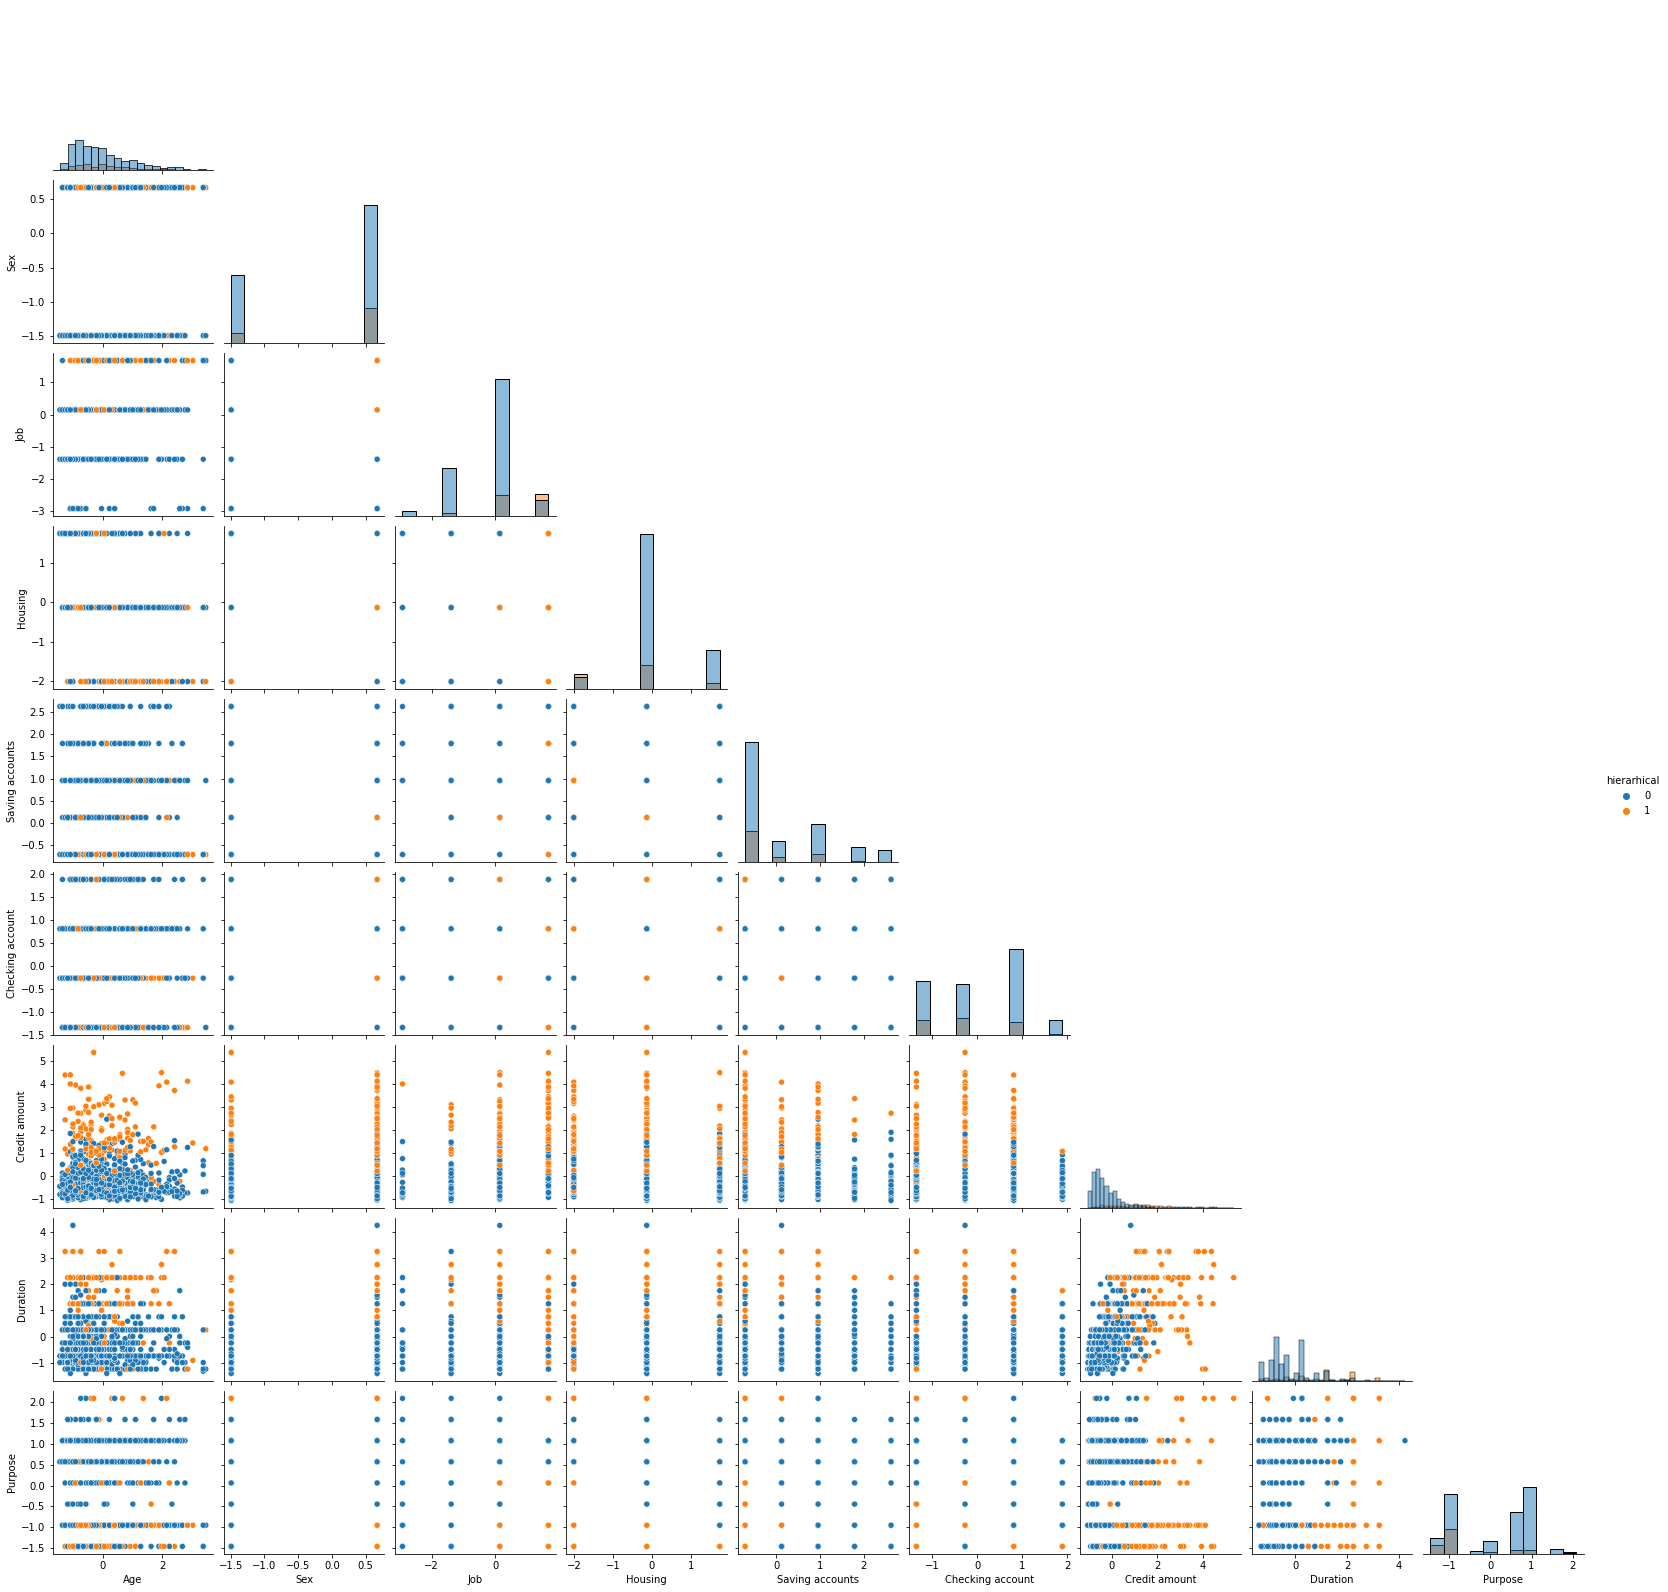

In [20]:
# Просматривается четкое разделение по Credit amount
sns.pairplot(df_hierarhical, kind="scatter", hue='hierarhical', diag_kind="hist", corner=True)

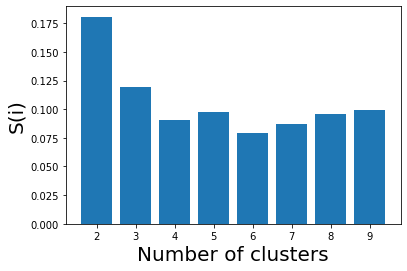

In [21]:
# Два кластера 
silhouette(df)

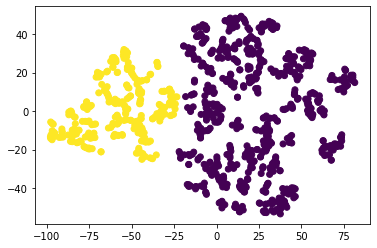

In [22]:
# TSNE с двумя компонентами
tsne = TSNE(n_components=2, perplexity=10, learning_rate=100, init='random', random_state=0)

df_transformed = pd.DataFrame(tsne.fit_transform(df))

hierarhical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
df_transformed['hierarhical'] =  hierarhical.fit_predict(df_transformed)

df_transformed.columns =  [str(x) for x in df_transformed.columns]


plt.scatter(df_transformed['0'], df_transformed['1'], c=df_transformed['hierarhical'])
plt.show()

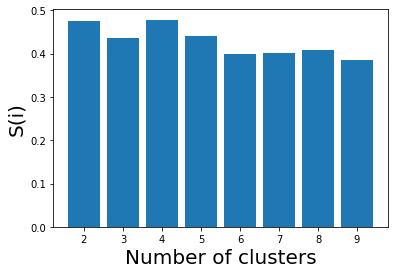

In [23]:
# Выделяются 2 или 4 комонента
silhouette(df_transformed.drop('hierarhical', axis=1))

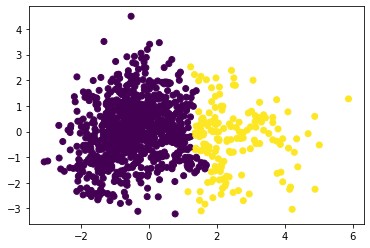

In [24]:
# МГК с двумя компонентами
pca = PCA(n_components=2, random_state=0)
df_transformed = pd.DataFrame(pca.fit_transform(df))


hierarhical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
df_transformed['hierarhical'] =  hierarhical.fit_predict(df_transformed)

df_transformed.columns =  [str(x) for x in df_transformed.columns]


plt.scatter(df_transformed['0'], df_transformed['1'], c=df_transformed['hierarhical'])
plt.show()

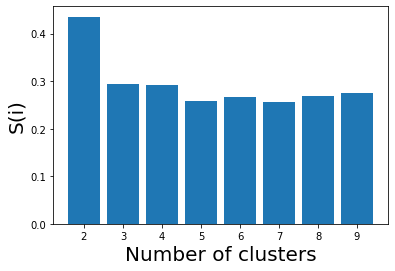

In [25]:
# Снова 2 кластера 
silhouette(df_transformed.drop('hierarhical', axis=1))

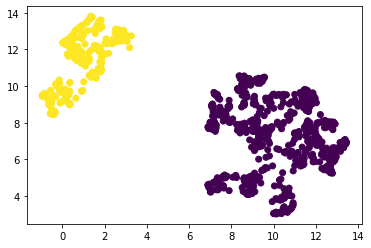

In [26]:
# UMAP
umap_transformator = umap.UMAP(random_state=0)
df_transformed = pd.DataFrame(umap_transformator.fit_transform(df))
 
hierarhical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
df_transformed['hierarhical'] =  hierarhical.fit_predict(df_transformed)

df_transformed.columns =  [str(x) for x in df_transformed.columns]


plt.scatter(df_transformed['0'], df_transformed['1'], c=df_transformed['hierarhical'])
plt.show()

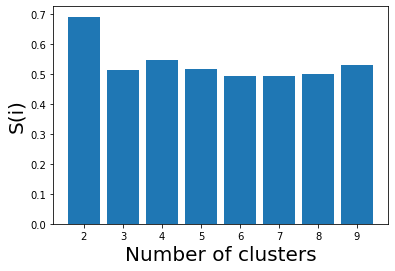

In [27]:
# По картинке видно, что два кластера
silhouette(df_transformed.drop('hierarhical', axis=1))

### DBSCAN

In [28]:
dbscan = DBSCAN()
df_dbscan = df.copy()
df_dbscan['dbscan'] =  dbscan.fit_predict(df)

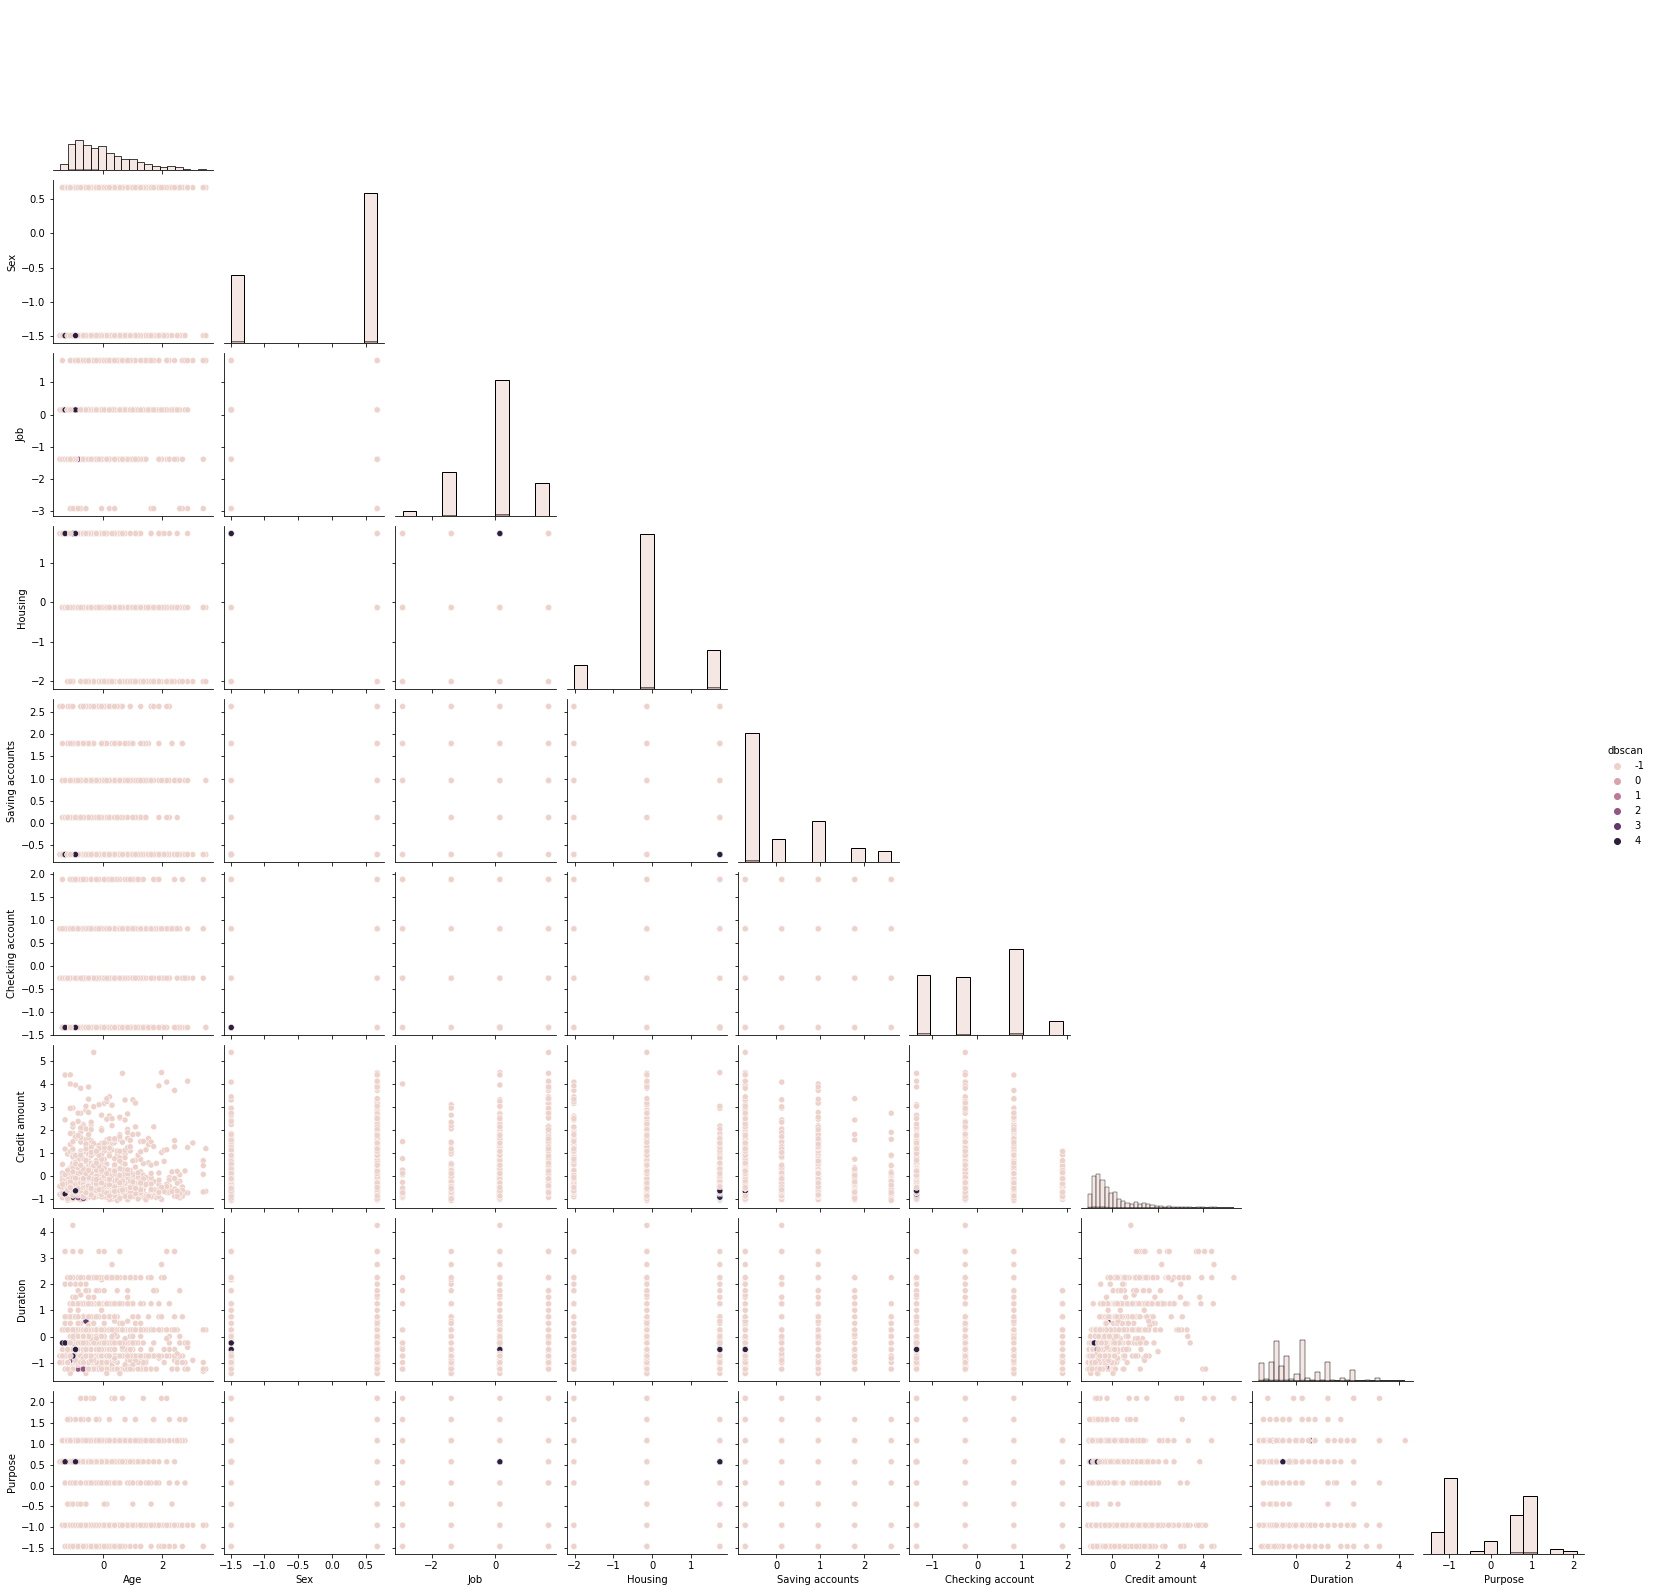

In [29]:
# Очень странное распределение на 6 кластеров
sns.pairplot(df_dbscan, kind="scatter", hue='dbscan', diag_kind="hist", corner=True)

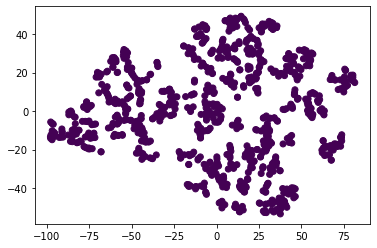

In [30]:
# TSNE с двумя компонентами
# Поулчается, что на кластеры не разбил
tsne = TSNE(n_components=2, perplexity=10, learning_rate=100, init='random', random_state=0)

df_transformed = pd.DataFrame(tsne.fit_transform(df))

dbscan = DBSCAN()
df_transformed['dbscan'] =  dbscan.fit_predict(df_transformed)

df_transformed.columns =  [str(x) for x in df_transformed.columns]


plt.scatter(df_transformed['0'], df_transformed['1'], c=df_transformed['dbscan'])
plt.show()

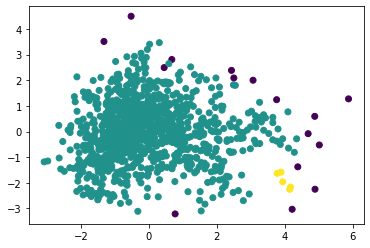

In [31]:
# МГК с двумя компонентами
pca = PCA(n_components=2, random_state=0)
df_transformed = pd.DataFrame(pca.fit_transform(df))


dbscan = DBSCAN()
df_transformed['dbscan'] =  dbscan.fit_predict(df_transformed)

df_transformed.columns =  [str(x) for x in df_transformed.columns]


plt.scatter(df_transformed['0'], df_transformed['1'], c=df_transformed['dbscan'])
plt.show()

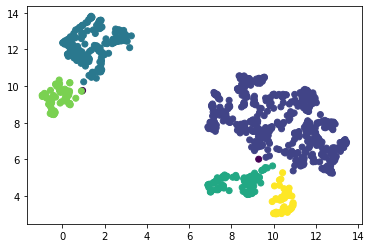

In [32]:
umap_transformator = umap.UMAP(random_state=0)
df_transformed = pd.DataFrame(umap_transformator.fit_transform(df))
 
dbscan = DBSCAN()
df_transformed['dbscan'] =  dbscan.fit_predict(df_transformed)

df_transformed.columns =  [str(x) for x in df_transformed.columns]


plt.scatter(df_transformed['0'], df_transformed['1'], c=df_transformed['dbscan'])
plt.show()

## Interpretation

In [33]:
umap_transformator = umap.UMAP(random_state=0)
df_transformed = pd.DataFrame(umap_transformator.fit_transform(df))
 
hierarhical = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')


In [70]:
base['classes'] = hierarhical.fit_predict(df_transformed)

Заметка: Можно заметить, что в классе 0 в среднем выше размер кредита по группам

In [71]:
base.groupby('classes').mean()

,Age,Job,Credit amount,Duration
classes,,,,
0,36.947218,1.948645,3545.707561,21.684736
1,32.260870,1.799331,2627.816054,19.070234


In [72]:
base.loc[base['classes'] == 0,].describe()

,Age,Job,Credit amount,Duration,classes
count,701.000000,701.000000,701.000000,701.000000,701.0
mean,36.947218,1.948645,3545.707561,21.684736,0.0
std,11.115950,0.650441,3033.649543,12.526277,0.0
min,20.000000,0.000000,276.000000,4.000000,0.0
25%,28.000000,2.000000,1449.000000,12.000000,0.0
50%,35.000000,2.000000,2483.000000,18.000000,0.0
75%,43.000000,2.000000,4473.000000,27.000000,0.0
max,75.000000,3.000000,18424.000000,72.000000,0.0


In [73]:
base.loc[base['classes'] == 1,].describe()

,Age,Job,Credit amount,Duration,classes
count,299.000000,299.000000,299.000000,299.000000,299.0
mean,32.260870,1.799331,2627.816054,19.070234,1.0
std,11.318105,0.650142,2121.448934,10.681717,0.0
min,19.000000,0.000000,250.000000,4.000000,1.0
25%,24.000000,1.500000,1238.500000,12.000000,1.0
50%,28.000000,2.000000,1882.000000,18.000000,1.0
75%,37.000000,2.000000,3467.500000,24.000000,1.0
max,75.000000,3.000000,11590.000000,60.000000,1.0


In [74]:
base.groupby(['classes', 'Checking account']).mean()

Age       Job  Credit amount   Duration
classes Checking account                                               
0       little            37.513228  1.915344    3489.412698  22.211640
        moderate          34.826316  1.968421    4176.100000  23.326316
        rich              37.418605  1.813953    2438.860465  18.813953
1       little            30.505882  1.788235    2476.600000  19.400000
        moderate          32.291139  1.734177    2989.303797  21.126582
        rich              36.700000  1.700000    1616.050000  14.200000

In [75]:
base.groupby(['classes', 'Saving accounts']).mean()

Age       Job  Credit amount   Duration
classes Saving accounts                                               
0       little           36.643541  1.940191    3460.186603  21.157895
        moderate         33.569444  2.000000    3712.847222  23.805556
        quite rich       38.170213  1.893617    2370.085106  18.553191
        rich             38.758621  1.896552    3023.241379  19.206897
1       little           31.740541  1.821622    2572.459459  18.821622
        moderate         31.741935  1.709677    2620.354839  20.258065
        quite rich       33.187500  1.562500    3165.562500  20.437500
        rich             34.736842  1.789474    1886.789474  16.947368

In [76]:
base.groupby(['classes', 'Purpose']).median()

Age  Job  Credit amount  Duration
classes Purpose                                                
0       business             34.0  2.0         3566.0      24.0
        car                  36.0  2.0         2860.5      18.0
        domestic appliances  42.0  2.0         1300.0      13.5
        education            38.0  2.0         1977.0      18.0
        furniture/equipment  33.0  2.0         2793.5      19.0
        radio/TV             33.0  2.0         1934.0      18.0
        repairs              34.0  2.0         1555.0      15.0
        vacation/others      39.0  3.0         7582.0      24.0
1       business             27.0  2.0         2050.0      24.0
        car                  29.0  2.0         2133.0      18.0
        domestic appliances  24.0  2.0         1055.0      13.5
        education            34.0  2.0         1372.5      12.0
        furniture/equipment  26.0  2.0         2146.0      15.0
        radio/TV             29.0  2.0         1715.0      18.0
        repairs              25.0  2.0         1943.0      18.0
        vacation/others      58.0  1.0         1755.0      24.0

Заметка: По сберегательному и чековому счетам особых различий в классах нет. В обоих классах примерно одинаковое количество(в процентах) по групппам

In [94]:
checking_group = base.groupby(['classes', 'Checking account']).agg({'Age': 'count'})
checking_group.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Age
classes Checking account           
0       little            44.786730
        moderate          45.023697
        rich              10.189573
1       little            46.195652
        moderate          42.934783
        rich              10.869565

In [95]:
saving_group = base.groupby(['classes', 'Saving accounts']).agg({'Age': 'count'})
saving_group.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Age
classes Saving accounts           
0       little           73.851590
        moderate         12.720848
        quite rich        8.303887
        rich              5.123675
1       little           73.705179
        moderate         12.350598
        quite rich        6.374502
        rich              7.569721

In [93]:
housing_group = base.groupby(['classes', 'Housing']).agg({'Age': 'count'})
housing_group.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Age
classes Housing           
0       free     13.837375
        own      74.037090
        rent     12.125535
1       free      3.678930
        own      64.882943
        rent     31.438127

Заметка: Интересно, что в класс 1 попали только люди женского пола, а в класс 0 почти только мужчины 

In [77]:
base.groupby(['classes', 'Sex']).mean()

Age       Job  Credit amount   Duration
classes Sex                                                  
0       female  47.545455  2.818182    9672.090909  29.454545
        male    36.778261  1.934783    3448.040580  21.560870
1       female  32.260870  1.799331    2627.816054  19.070234

In [97]:
sex_group = base.groupby(['classes', 'Sex']).agg({'Age': 'count'})
sex_group.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Age
classes Sex               
0       female    1.569187
        male     98.430813
1       female  100.000000

Заметка: В классе 1 гораздо выше людей в возрасле от 18 до 25, но почти в 2 раза меньше от 36 до 60

In [78]:
interval = (18, 25, 35, 60, 120)
age_cat = ['18-25', '26-35', '36-60', '61-120']
base["Age_cat"] = pd.cut(base['Age'], interval, labels=age_cat)

In [79]:
base.groupby(['classes', 'Age_cat']).mean()

Age       Job  Credit amount   Duration
classes Age_cat                                               
0       18-25    23.151163  1.732558    3334.337209  22.139535
        26-35    30.361702  1.992908    3493.216312  21.932624
        36-60    43.795302  1.986577    3660.523490  21.614094
        61-120   65.600000  1.800000    3510.428571  19.171429
1       18-25    23.076923  1.769231    2729.663462  19.519231
        26-35    29.612069  1.922414    2825.793103  20.068966
        36-60    45.739130  1.623188    2266.840580  17.666667
        61-120   65.500000  1.900000    1762.800000  12.500000

In [96]:
age_group = base.groupby(['classes', 'Age_cat']).agg({'Age': 'count'})
age_group.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Age
classes Age_cat           
0       18-25    12.268188
        26-35    40.228245
        36-60    42.510699
        61-120    4.992867
1       18-25    34.782609
        26-35    38.795987
        36-60    23.076923
        61-120    3.344482

In [80]:
pd.crosstab(base['Sex'], base['Job'])

Job,0,1,2,3
Sex,,,,
female,12,64,197,37
male,10,136,433,111


In [98]:
purpose_group = base.groupby(['classes', 'Purpose']).agg({'Age': 'count'})
purpose_group.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

Age
classes Purpose                       
0       business             11.269615
        car                  35.663338
        domestic appliances   0.855920
        education             4.992867
        furniture/equipment  15.406562
        radio/TV             27.817404
        repairs               2.425107
        vacation/others       1.569187
1       business              6.020067
        car                  29.096990
        domestic appliances   2.006689
        education             8.026756
        furniture/equipment  24.414716
        radio/TV             28.428094
        repairs               1.672241
        vacation/others       0.334448

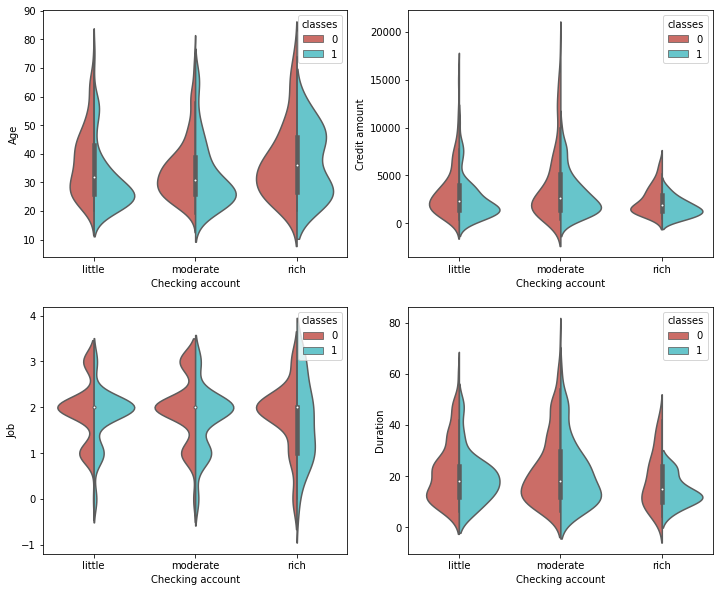

In [81]:
plt.figure(figsize = (12,10))
g = plt.subplot(221)
g = sns.violinplot(x="Checking account", y="Age", data=base, palette="hls", 
                   hue = "classes",split=True)
g1 = plt.subplot(222)
g1 = sns.violinplot(x="Checking account", y="Credit amount", data=base, palette="hls", 
                    hue = "classes",split=True)
g2 = plt.subplot(223)
g2 = sns.violinplot(x="Checking account", y="Job", data=base, palette="hls", 
                    hue = "classes",split=True)
g3 = plt.subplot(224)
g3 = sns.violinplot(x="Checking account", y="Duration", data=base, palette="hls", 
                    hue = "classes",split=True)

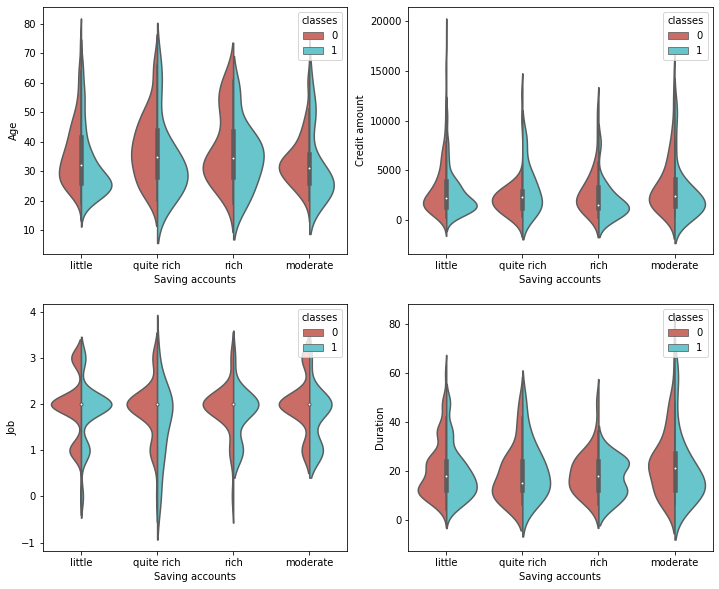

In [82]:
plt.figure(figsize = (12,10))
g = plt.subplot(221)
g = sns.violinplot(x="Saving accounts", y="Age", data=base, palette="hls", 
                   hue = "classes",split=True)
g1 = plt.subplot(222)
g1 = sns.violinplot(x="Saving accounts", y="Credit amount", data=base, palette="hls", 
                    hue = "classes",split=True)
g2 = plt.subplot(223)
g2 = sns.violinplot(x="Saving accounts", y="Job", data=base, palette="hls", 
                    hue = "classes",split=True)
g3 = plt.subplot(224)
g3 = sns.violinplot(x="Saving accounts", y="Duration", data=base, palette="hls", 
                    hue = "classes",split=True)

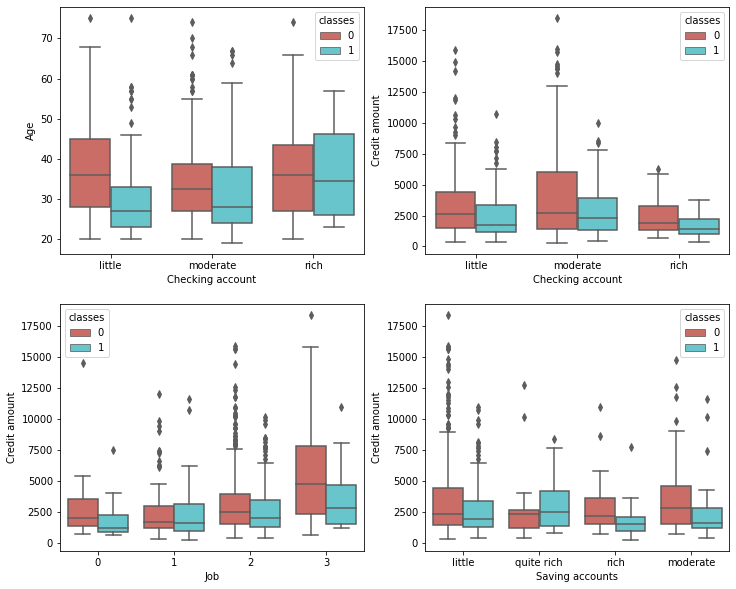

In [83]:
plt.figure(figsize = (12,10))
g = plt.subplot(221)
g = sns.boxplot(x="Checking account", y="Age", data=base, palette="hls", 
                hue = "classes")
g = plt.subplot(222)
g = sns.boxplot(x="Checking account", y="Credit amount", data=base, palette="hls", 
                hue = "classes")
g = plt.subplot(223)
g = sns.boxplot(x="Job", y="Credit amount", data=base, palette="hls", 
                hue = "classes")
g = plt.subplot(224)
g = sns.boxplot(x="Saving accounts", y="Credit amount", data=base, palette="hls", 
                hue = "classes")

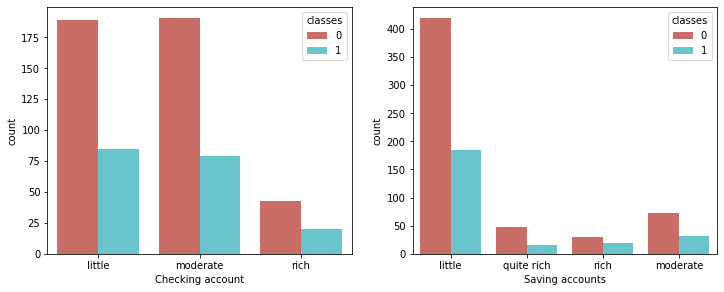

In [84]:
plt.figure(figsize = (12,10))

g = plt.subplot(221)
g = sns.countplot(x="Checking account", data=base, 
              palette="hls", hue="classes")
g1 = plt.subplot(222)
g1 = sns.countplot(x="Saving accounts", data=base, 
              palette="hls", hue="classes")

## Вывод
* класс 0: В основном мужчины, 26-60 лет, берут в кредит большие 
суммы, которые вкладывает в бизнес
* класс 1: Женщины, 18-35 лет, в кредит берут суммы поменьше на образование и покупку мебели

Так как это задача кредитного скоринга, то можно предположить, что кластеры разделены по риску возврата или просрочки кредита. Я считаю, что класс 0 - это люди с низким риском невозврата, а класс 1 - с высоким риском невозврата.